## Importing for packages

In [180]:
# Import these packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pydicom #Read mammogram images stored in DICOM files
import cv2
import random
import os
import seaborn as sns
sns.set()

In [3]:
path = r"/Users/isa/Google Drive/cancer-data/"
!ls "{path}"

BenignCalc    BenignMass    MalignantCalc MalignantMass repeat


## Crosschecking files for "black images"

In [115]:
# Important functions
def stacker(path):
    files=os.listdir(path)
    for x in range(0,len(files),10):
        img_top_stack=[return_image(path,file) for file in files[x:x+5]]
        img_bottom_stack=[return_image(path,file) for file in files[x+5:x+10]]
        yield np.vstack([np.hstack(img_top_stack),np.hstack(img_bottom_stack)])
        
def return_image(path,file='',resize=False):
    if file is not '':
        path= os.path.join(path,file)
    if resize:
        return cv2.resize(pydicom.dcmread(path,force=True).pixel_array,(400,400))
    else: return pydicom.dcmread(path,force=True).pixel_array

In [86]:
path="/Users/isa/Google Drive/cancer-data/BenignCalc"
img_gen=stacker(path)

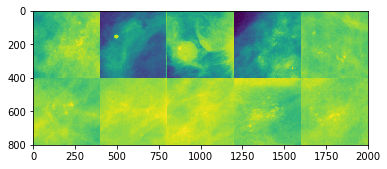

In [81]:
#plt.Axes(fig=(10,16))
plt.imshow(next(img_gen))

In [72]:
path="/Users/isa/Google Drive/cancer-data/MalignantMass"
file=os.path.join(path,'Malignant-mass682')
img=cv2.resize(pydicom.dcmread(file,force=True).pixel_array,(400,400))
plt.imshow(img)

OSError: [Errno 22] Invalid argument

In [60]:
# Number of Images present in each folder
path = r"/Users/isa/Google Drive/cancer-data/"
folder_paths=["MalignantCalc","BenignCalc","MalignantMass","BenignMass"]
sum=0
for x in folder_paths:
    files =!ls "{path}{x}"
    print(x,':',len(files))
    sum+=len(files)
print(sum)

MalignantCalc : 672
BenignCalc : 658
MalignantMass : 786
BenignMass : 967
3083


In [42]:
print(path+files[0])

/Users/isa/Google Drive/cancer-data/Benign-mass1


In [82]:
# Create a dataframe from all the images
path = r"/Users/isa/Google Drive/cancer-data/"
folder_paths=["MalignantCalc","BenignCalc","MalignantMass","BenignMass"]

li=[]
x='BenignMass'
files =!ls "{path}{x}"
MCpath=path+x+"/"
for image_name in files:
    try:
        img=pydicom.dcmread(MCpath+image_name,force=True).pixel_array
    except:
        print(image_name)
    finally:
        li.append([image_name,MCpath+image_name,'BENIGN','MASS',img.shape[0],img.shape[1]])

print(len(li))



967


In [83]:
MC=pd.DataFrame(columns=['name','path','label','calc/mass','length','width'],data=li)
MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
name         967 non-null object
path         967 non-null object
label        967 non-null object
calc/mass    967 non-null object
length       967 non-null int64
width        967 non-null int64
dtypes: int64(2), object(4)
memory usage: 45.4+ KB


In [84]:
MC.to_csv('BM.csv',index=False)

In [152]:
dfBM=pd.read_csv('BM.csv',index_col='name')
display(dfBM.info())
dfBC=pd.read_csv('BC.csv',index_col='name')
dfMC=pd.read_csv('MC.csv',index_col='name')
display(dfBC.info())
display(dfMC.info())

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, Benign-mass1 to Benign-mass99
Data columns (total 5 columns):
path         967 non-null object
label        967 non-null object
calc/mass    967 non-null object
length       967 non-null int64
width        967 non-null int64
dtypes: int64(2), object(3)
memory usage: 45.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, Benign-calc1 to Benign-calc99
Data columns (total 5 columns):
path         658 non-null object
label        658 non-null object
calc/mass    658 non-null object
length       658 non-null int64
width        658 non-null int64
dtypes: int64(2), object(3)
memory usage: 30.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, Malignant-calc1 to Malignant-calc99
Data columns (total 5 columns):
path         672 non-null object
label        672 non-null object
calc/mass    672 non-null object
length       672 non-null int64
width        672 non-null int64
dtypes: int64(2), object(3)
memory usage: 31.5+ KB


None

/Users/isa/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


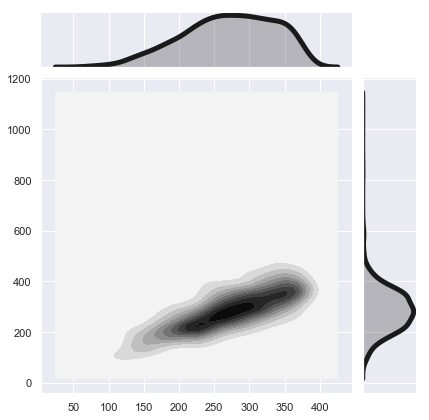

In [213]:
df.loc[df['length'].idxmax()]
sel=df.sort_values(by=['length','width'],ascending=False)[['length','width','path']].iloc[1000:]
#print(sel.length.mean())
#print(sel.length.median())

#print(sel.width.mean())
#print(sel.width.median())

#plt.imshow(return_image(sel.path.iloc[-9]))
sns.jointplot(x=sel.length.values,y=sel.width.values,kind='kde',color='k')

In [76]:
path="/Users/isa/Google Drive/cancer-data/MalignantMass"
"""
Malignant-mass181
Malignant-mass682
"""
file=os.path.join(path,'Malignant-mass181')
ds=pydicom.dcmread(file,force=True)
ds.Columns

3544

In [183]:
#Concatenate all three CSVs
#df=pd.concat([dfBM,dfBC,dfMC])
#df.to_csv('main_woMM.csv',index=False)

In [191]:
display(sns.axes_style())
display(sns.plotting_context())
sns.set_context(rc={"lines.linewidth": 5})

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

{'font.size': 12.0,
 'axes.labelsize': 12.0,
 'axes.titlesize': 12.0,
 'xtick.labelsize': 11.0,
 'ytick.labelsize': 11.0,
 'legend.fontsize': 11.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 2.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}